In [1]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

# Replace 'your_file.csv' with the uploaded file name
df = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))
df.head()


Saving diabetes.csv to diabetes.csv


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# Check for zero values in key columns
columns_with_possible_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_with_possible_zeros].eq(0).sum()


,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11


In [3]:
import numpy as np

# List of columns where 0 should be treated as missing
columns_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0s with NaN so we can use fillna
df[columns_to_fix] = df[columns_to_fix].replace(0, np.nan)

# Fill missing values with the median of each column
df[columns_to_fix] = df[columns_to_fix].fillna(df[columns_to_fix].median())

# Verify it's fixed
df[columns_to_fix].isnull().sum()


,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0


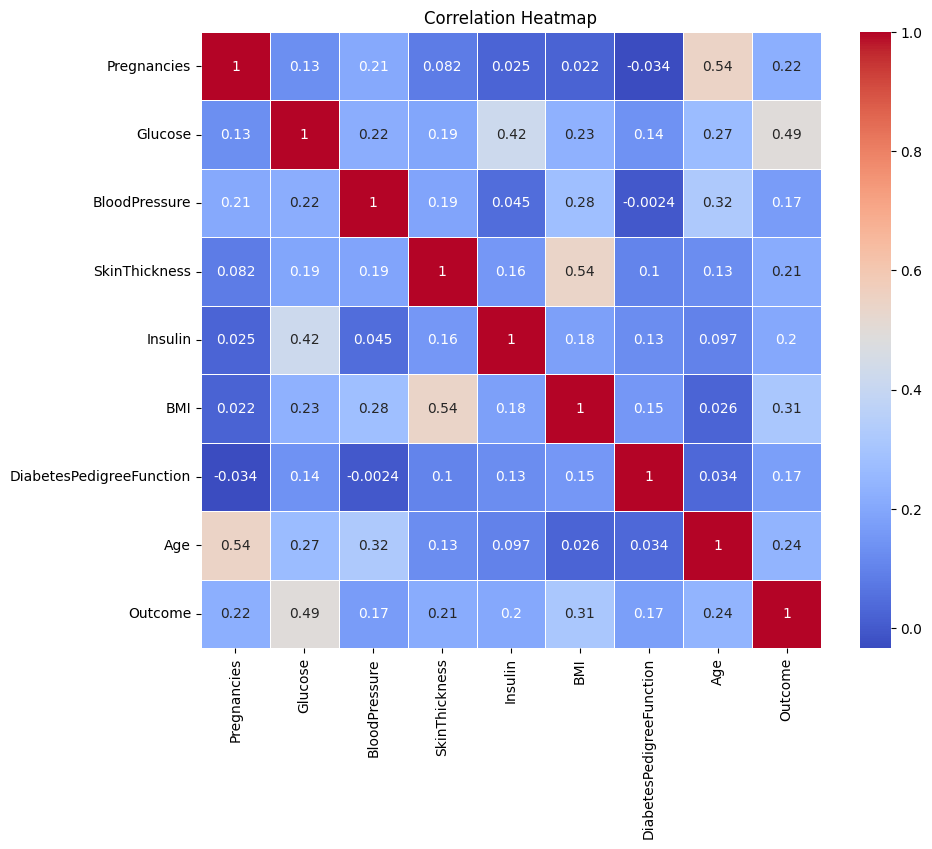

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


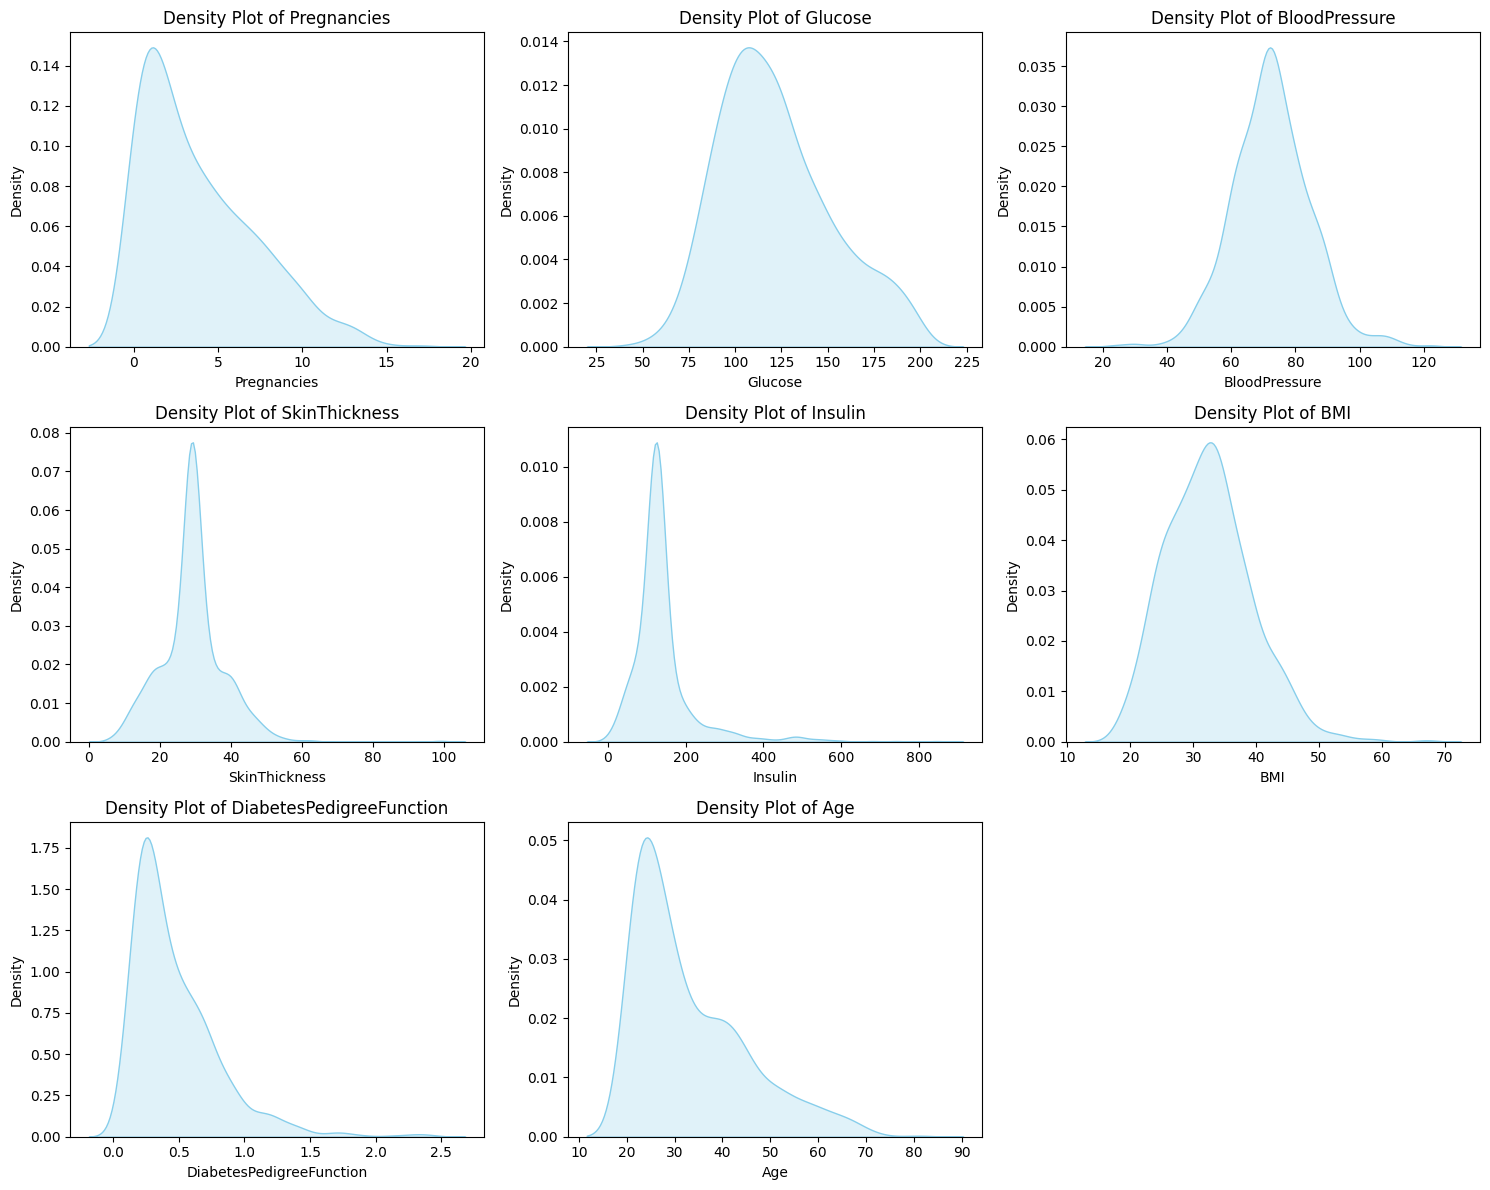

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting area
plt.figure(figsize=(15, 12))
for i, column in enumerate(df.columns[:-1]):  # Exclude 'Outcome'
    plt.subplot(3, 3, i + 1)
    sns.kdeplot(df[column], fill=True, color='skyblue')
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


<ipython-input-6-23582bae3371>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='Set2')


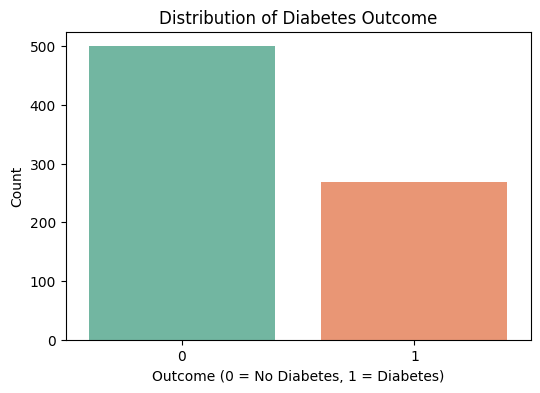

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot (bar plot) for Outcome
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df, palette='Set2')
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Count')
plt.show()


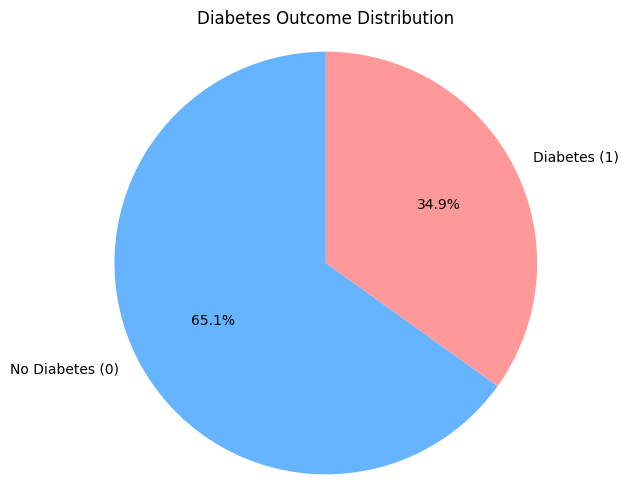

In [7]:
import matplotlib.pyplot as plt

# Count values
outcome_counts = df['Outcome'].value_counts()
labels = ['No Diabetes (0)', 'Diabetes (1)']
colors = ['#66b3ff','#ff9999']

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(outcome_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Diabetes Outcome Distribution')
plt.axis('equal')  # Makes the pie circular
plt.show()


In [11]:
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers

# Example: Detect outliers in 'Glucose'
outliers_glucose = detect_outliers_iqr(df, 'Glucose')
print(f"Number of outliers in Glucose: {len(outliers_glucose)}")


Number of outliers in Glucose: 0


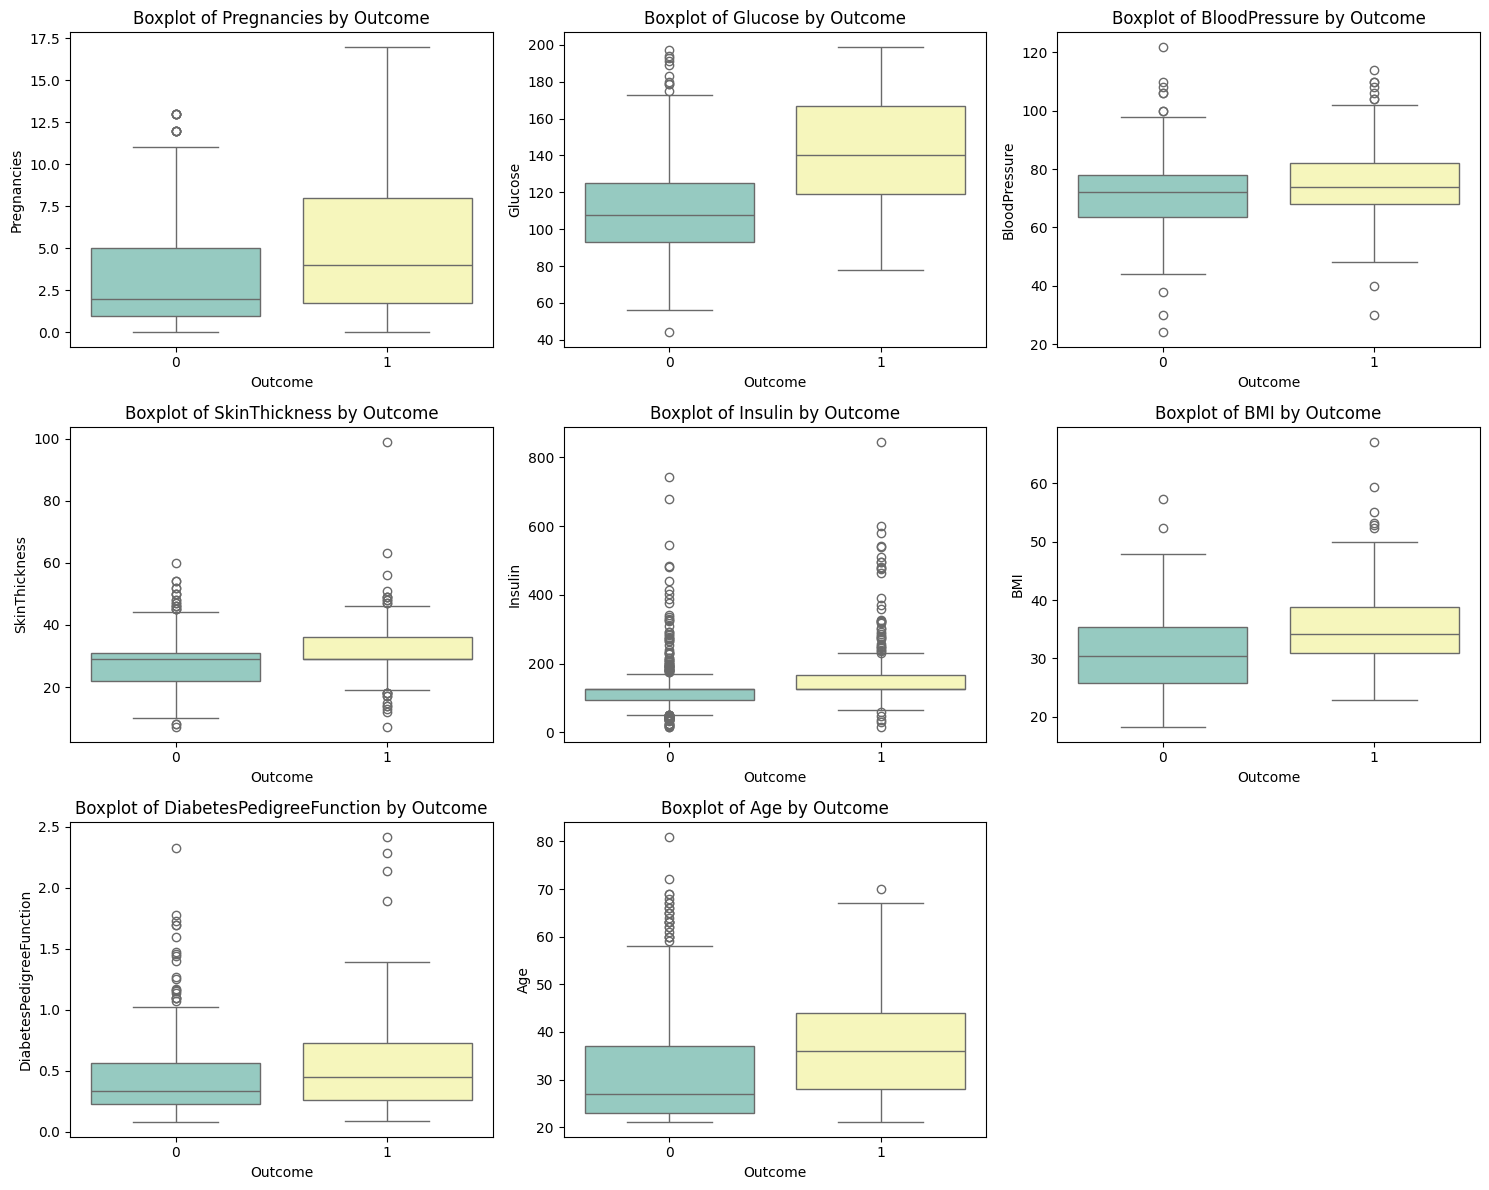

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 12))

for i, col in enumerate(df.columns[:-1]):  # exclude the target column 'Outcome'
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Outcome', y=col, data=df, palette='Set3')
    plt.title(f'Boxplot of {col} by Outcome')

plt.tight_layout()
plt.show()


In [8]:
df.shape

(768, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [13]:
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    df[col] = df[col].replace(0, df[col].median())


In [14]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 100], labels=['20-30', '31-40', '41-50', '51-60', '60+'])
df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
df['HighGlucose'] = (df['Glucose'] > 140).astype(int)


In [16]:
# Select columns to encode
categorical_cols = ['AgeGroup', 'BMI_Category']

# One-hot encode
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Now scale numeric features only
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded.drop('Outcome', axis=1))


In [18]:
# List your categorical columns
categorical_cols = ['AgeGroup', 'BMI_Category']

# One-hot encode categorical columns (this converts them to numeric)
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Now scale all numeric columns except the target
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded.drop('Outcome', axis=1))

# Convert back to DataFrame if needed
scaled_df = pd.DataFrame(scaled_features, columns=df_encoded.drop('Outcome', axis=1).columns)
print(scaled_df.head())


   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.866045      -0.031990       0.670643 -0.181541  0.166619   
1    -0.844885 -1.205066      -0.528319      -0.012301 -0.181541 -0.852200   
2     1.233880  2.016662      -0.693761      -0.012301 -0.181541 -1.332500   
3    -0.844885 -1.073567      -0.528319      -0.695245 -0.540642 -0.633881   
4    -1.141852  0.504422      -2.679076       0.670643  0.316566  1.549303   

   DiabetesPedigreeFunction       Age  HighGlucose  AgeGroup_31-40  \
0                  0.468492  1.425995     1.732051       -0.506908   
1                 -0.365061 -0.190672    -0.577350        1.972744   
2                  0.604397 -0.105584     1.732051        1.972744   
3                 -0.920763 -1.041549    -0.577350       -0.506908   
4                  5.484909 -0.020496    -0.577350        1.972744   

   AgeGroup_41-50  AgeGroup_51-60  AgeGroup_60+  BMI_Category_Normal  \
0        2.407584        -0.27501     

In [20]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 100], labels=['20-30', '31-40', '41-50', '51-60', '60+'])
df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])


In [21]:
categorical_cols = ['AgeGroup', 'BMI_Category']

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded.drop('Outcome', axis=1))


In [23]:
scaled_df = pd.DataFrame(scaled_features, columns=df_encoded.drop('Outcome', axis=1).columns)
scaled_df['Outcome'] = df_encoded['Outcome'].values


In [10]:
import numpy as np
import pickle
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import (
    confusion_matrix, accuracy_score, mean_squared_error,
    r2_score, roc_auc_score, roc_curve, classification_report
)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold

import warnings
warnings.simplefilter(action="ignore")


**Model Design**

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [25]:
X = scaled_df.drop('Outcome', axis=1)
y = scaled_df['Outcome']


In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [27]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [28]:
y_pred = rf_model.predict(X_test)


In [29]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7467532467532467

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.81       100
           1       0.66      0.57      0.61        54

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.75      0.74       154


Confusion Matrix:
 [[84 16]
 [23 31]]


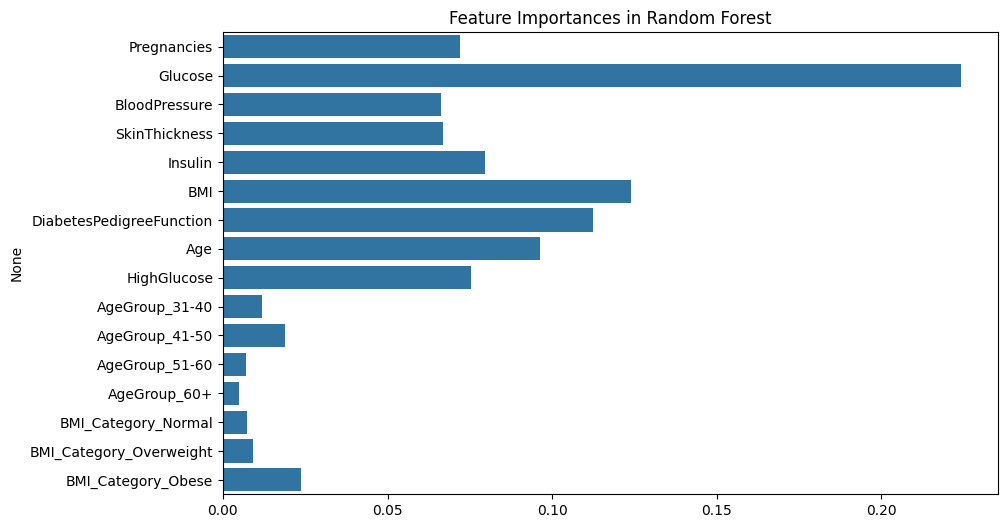

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances in Random Forest")
plt.show()


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assume your data is ready:
X = scaled_df.drop('Outcome', axis=1)
y = scaled_df['Outcome']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Create a Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],        # Number of trees
    'max_depth': [None, 5, 10, 20],        # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],       # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],         # Minimum samples at a leaf node
    'bootstrap': [True, False]              # Whether bootstrap samples are used
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                # 5-fold cross-validation
    n_jobs=-1,           # Use all cores
    verbose=2,
    scoring='accuracy'
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Predict with the best estimator
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate on test data
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}
Best Cross-Validation Accuracy: 0.7736372117819539
Test Accuracy: 0.7532467532467533

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.67      0.57      0.62        54

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154


Confusion Matrix:
 [[85 15]
 [23 31]]


In [32]:
# Install LightGBM if not already installed
# !pip install lightgbm

import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df_encoded is your preprocessed DataFrame (after encoding categorical features)
# and scaled features if you want (LightGBM can handle unscaled data too)

X = df_encoded.drop('Outcome', axis=1)
y = df_encoded['Outcome']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Create LGBM classifier
lgbm = lgb.LGBMClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'num_leaves': [31, 50, 70],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 200, 300]
}

# Grid Search with 5-fold CV
grid_search = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Best params & score
print("Best parameters found:", grid_search.best_params_)
print("Best CV accuracy:", grid_search.best_score_)

# Predict with best model
best_lgbm = grid_search.best_estimator_
y_pred = best_lgbm.predict(X_test)

# Evaluate
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 680
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [33]:
# If you haven't installed xgboost, uncomment below
# !pip install xgboost

import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df_encoded is your processed dataframe (with categorical features encoded)
X = df_encoded.drop('Outcome', axis=1)
y = df_encoded['Outcome']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize XGBoost classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.05, 0.01],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.7, 1]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV on training data
grid_search.fit(X_train, y_train)

# Output best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Use best estimator to predict on test data
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

# Evaluate the model
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'colsample_bytree': 1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.7}
Best cross-validation accuracy: 0.776915900306544
Test Accuracy: 0.7337662337662337

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.80       100
           1       0.64      0.56      0.59        54

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.70       154
weighted avg       0.73      0.73      0.73       154


Confusion Matrix:
 [[83 17]
 [24 30]]


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df_encoded is your processed dataframe (all numeric features)
X = df_encoded.drop('Outcome', axis=1)
y = df_encoded['Outcome']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Create logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Hyperparameter grid to tune
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],     # Regularization strength
    'penalty': ['l2'],                # Use L2 regularization
    'solver': ['lbfgs']               # Solver that supports L2
}

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit model
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best CV accuracy:", grid_search.best_score_)

# Predict on test data
best_logreg = grid_search.best_estimator_
y_pred = best_logreg.predict(X_test)

# Evaluate
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV accuracy: 0.786711981873917
Test Accuracy: 0.7012987012987013

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.81      0.78       100
           1       0.59      0.50      0.54        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154


Confusion Matrix:
 [[81 19]
 [27 27]]


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Assume df_encoded is preprocessed dataset with numeric features and 'Outcome' as target
X = df_encoded.drop('Outcome', axis=1)
y = df_encoded['Outcome']

# Split once and use same split for all models
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
acc_logreg = accuracy_score(y_test, y_pred_logreg)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

# XGBoost
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)

# LightGBM
lgbm = lgb.LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)
acc_lgbm = accuracy_score(y_test, y_pred_lgbm)

# Print results
print(f"Logistic Regression Accuracy: {acc_logreg:.4f}")
print(f"Random Forest Accuracy: {acc_rf:.4f}")
print(f"XGBoost Accuracy: {acc_xgb:.4f}")
print(f"LightGBM Accuracy: {acc_lgbm:.4f}")

# Optional: Detailed classification reports (choose one to inspect)
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 680
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [ ]:
import pickle
from google.colab import files

# Save scaler as scaler.pkl
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save model as pickle.pkl
with open('pickle.pkl', 'wb') as f:
    pickle.dump(logreg, f)

# Download both files
files.download('scaler.pkl')
files.download('pickle.pkl')
